# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results, how='outer')
# Display the data table for preview
combinedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
miceCount = combinedData["Mouse ID"].value_counts()
numberOfMice = len(miceCount)
numberOfMice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = combinedData.loc[combinedData.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicateMice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
allDuplicateMiceID = pd.DataFrame(duplicateMice)
allDuplicateMiceID

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = combinedData[combinedData['Mouse ID'].isin(duplicateMice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
cleanMice = cleanDF["Mouse ID"].value_counts()
cleanNumberOfMice = len(cleanMice)
cleanNumberOfMice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimenMean = cleanDF.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimenMedian = cleanDF.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimenVariance = cleanDF.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimenSTD = cleanDF.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimenSem = cleanDF.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

summaryStatsTable = pd.DataFrame({"Mean": regimenMean, "Median": regimenMedian, "Variance": regimenVariance, "Standard Deviation":
                                  regimenSTD, "SEM": regimenSem})

summaryStatsTable

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

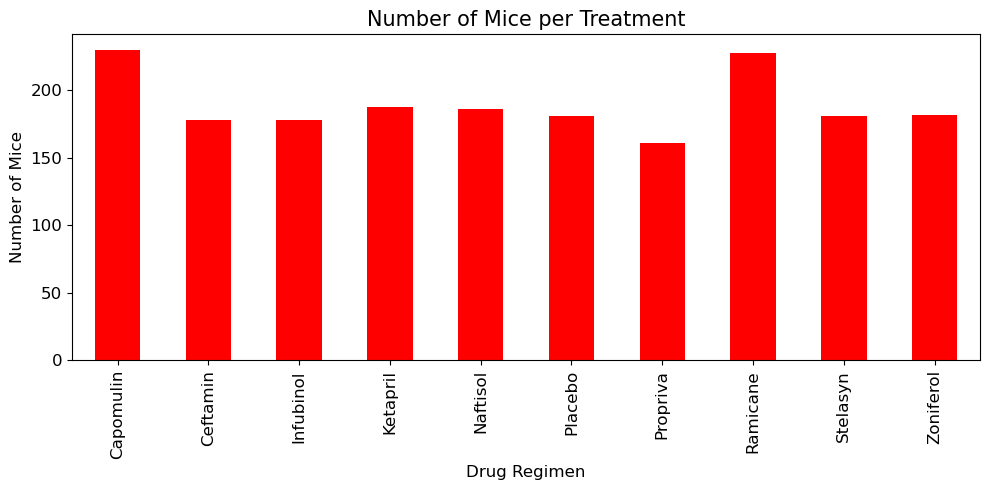

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
countMicePerTime = combinedData.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = countMicePerTime.plot.bar(figsize=(10,5), color='r', fontsize = 12)

plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment",fontsize = 15)

plt.tight_layout()
plt.show()


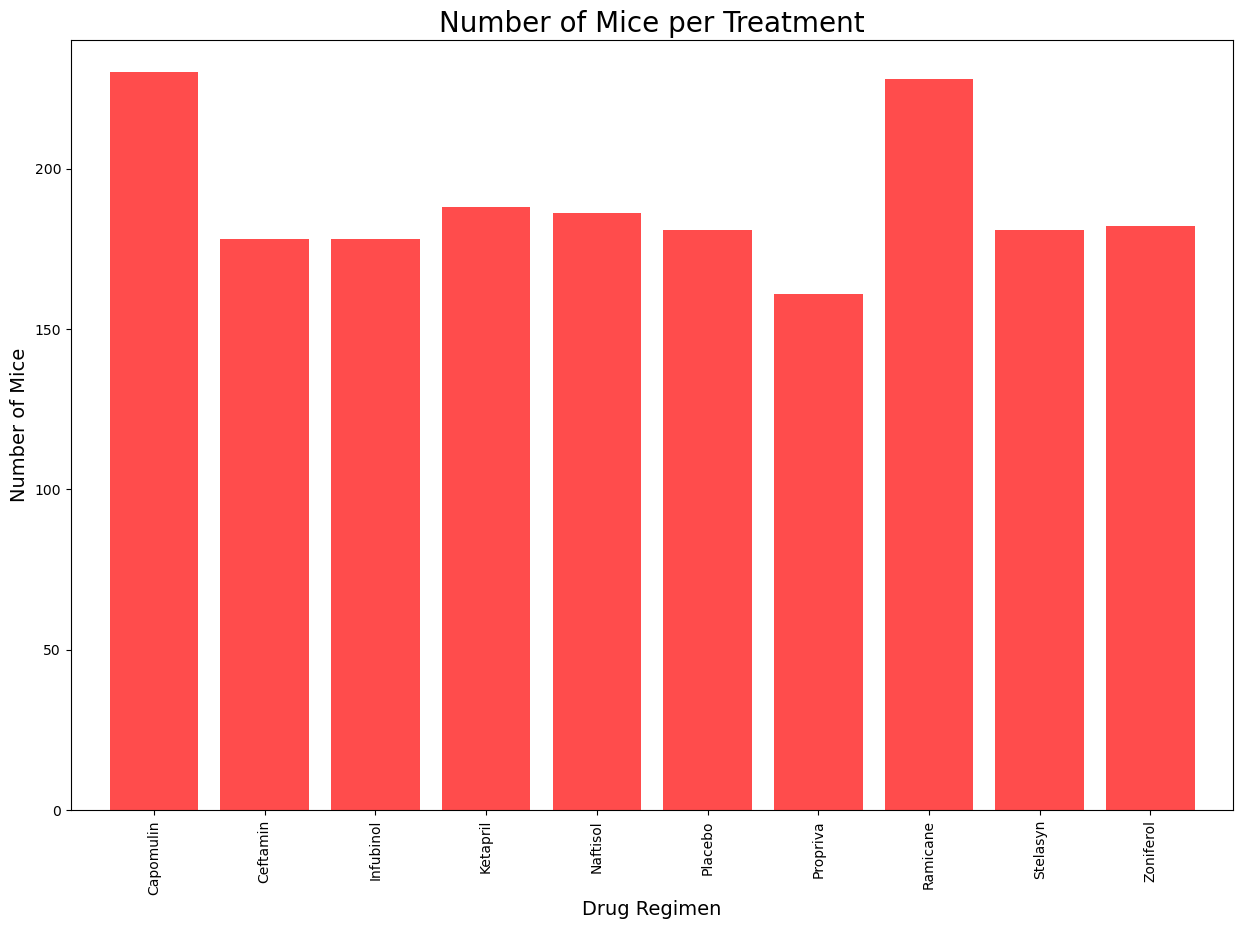

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# using an array that contains the number of mice each drug regimen has

miceList = (combinedData.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

# start building bar plot with pyplot

x_axis = np.arange(len(countMicePerTime))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, miceList, color='r', alpha=0.7, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(miceList)+10)

plt.title("Number of Mice per Treatment",fontsize=20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)

plt.show()


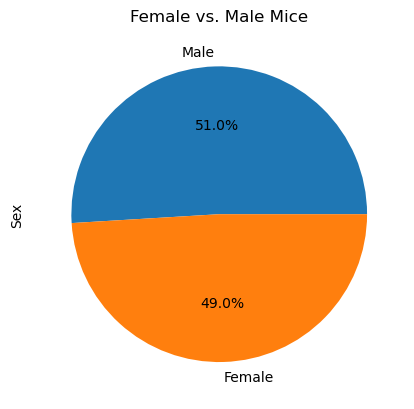

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderData = cleanDF["Sex"].value_counts()
plt.title("Female vs. Male Mice")
genderData.plot.pie(autopct= "%1.1f%%")
plt.show()

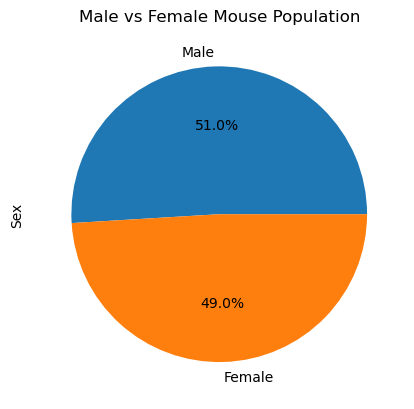

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = genderData.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# create dataframe for each treatment medication

CapomulinDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Capomulin",:]
RamicaneDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Ramicane", :]
InfubinolDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Infubinol", :]
CeftaminDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Ceftamin", :]

drugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combinedData[combinedData["Drug Regimen"].isin(drugList)]
drugs.head()

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

lastTimepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

# reshaping the dataframe: https://towardsdatascience.com/reshaping-dataframes-in-pandas-f6bfbb2c5b0f

lastTimepoint = lastTimepoint.stack(level=0).unstack(level=0)
for drug in drugList:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset    
    # Determine outliers using upper and lower bounds
    
treatment = 0
for drug in drugList:
    quartiles = lastTimepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} lower-bound outliers.")
    print(f"Values above {upper_bound} could be {drug} upper-bound outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1
    

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin lower-bound outliers.
Values above 51.83 could be Capomulin upper-bound outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane lower-bound outliers.
Values above 54.31 could be Ramicane upper-bound outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol lower-bound outliers.
Values above 82.75 could be Infub

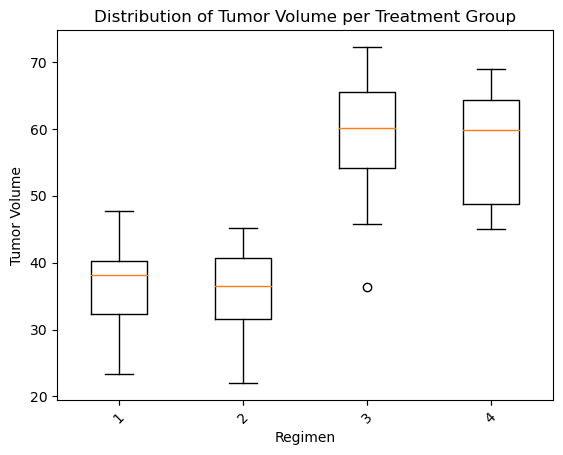

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# create a box plot list 

boxplotList = []
for drug in drugList:
    boxplotList.append(list(lastTimepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drugList, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Distribution of Tumor Volume per Treatment Group")
plt.boxplot(boxplotList)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

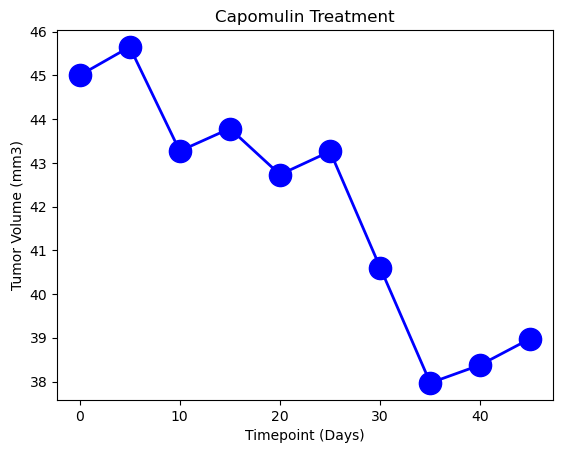

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# using b128 because it's the first one i saw when scrolling through mouse_metadata

forlineDF = CapomulinDF.loc[CapomulinDF["Mouse ID"] == "b128",:]
forlineDF.head()
x_axis = forlineDF["Timepoint"]
tumsiz = forlineDF["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatment')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=16,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

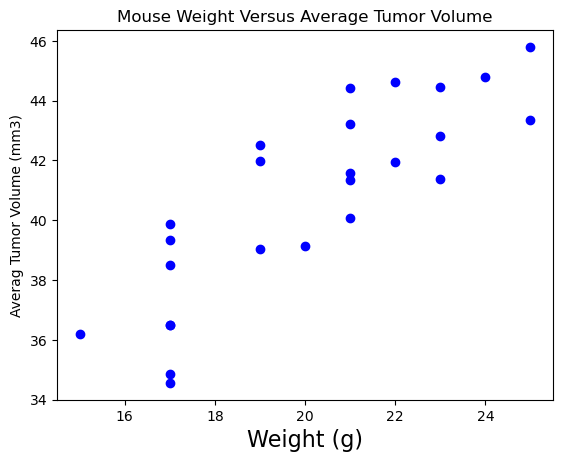

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avgCapmVol =CapomulinDF.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avgCapmVol['Weight (g)'],avgCapmVol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize = 16)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

